<a href="https://colab.research.google.com/github/S-K20/Basic-HTML-Page/blob/main/project_sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required libraries
!pip install shap

import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset
data = pd.read_csv("/content/depression_dataset.csv")

# Basic cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove special chars
    return text

data['clean_text'] = data['text'].apply(clean_text)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data['clean_text'],
    data['label'],
    test_size=0.2,
    random_state=42
)

# Convert text to numerical features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Evaluate
predictions = model.predict(X_test_tfidf)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

data_dict = {
    "text": [
        "I feel very sad and hopeless",
        "Life is beautiful and amazing",
        "I am tired of everything",
        "I love spending time with friends",
        "Nothing matters anymore",
        "I feel happy and motivated"
    ],
    "label": [1, 0, 1, 0, 1, 0]
}

data = pd.DataFrame(data_dict)
data.to_csv("depression_dataset.csv", index=False)

print("Dataset created successfully!")



Dataset created successfully!


In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv("depression_dataset_reddit_cleaned.csv")

print("Shape of dataset:", data.shape)
print("\nColumns:", data.columns)
print("\nFirst 5 rows:\n")
print(data.head())

print("\nClass Distribution:\n")
print(data.iloc[:, -1].value_counts())


Shape of dataset: (7731, 2)

Columns: Index(['clean_text', 'is_depression'], dtype='object')

First 5 rows:

                                          clean_text  is_depression
0  we understand that most people who reply immed...              1
1  welcome to r depression s check in post a plac...              1
2  anyone else instead of sleeping more when depr...              1
3  i ve kind of stuffed around a lot in my life d...              1
4  sleep is my greatest and most comforting escap...              1

Class Distribution:

is_depression
0    3900
1    3831
Name: count, dtype: int64


In [ ]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Features and labels
X = data['clean_text']
y = data['is_depression']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=15000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_tfidf, y_train)

# Predictions
predictions = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n")
print(classification_report(y_test, predictions))


Accuracy: 0.9618616677440207

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       780
           1       0.98      0.94      0.96       767

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547



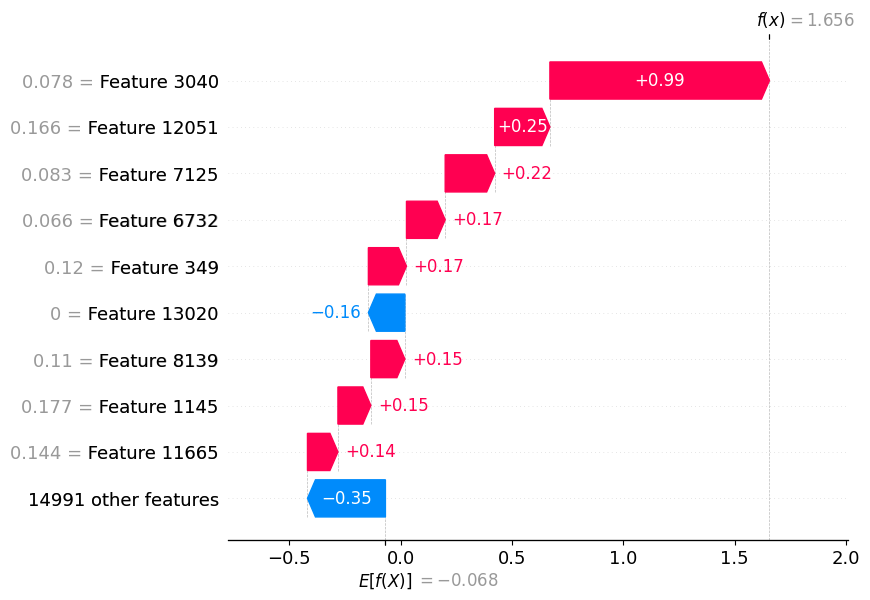

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(model, X_train_tfidf)

# Explain test samples
shap_values = explainer(X_test_tfidf[:10])

# Plot explanation for first test sample
shap.plots.waterfall(shap_values[0])


In [ ]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Create SHAP explainer again (more readable version)
explainer = shap.LinearExplainer(model, X_train_tfidf, feature_perturbation="interventional")

shap_values = explainer.shap_values(X_test_tfidf[:1])

# Convert to DataFrame for first sample
import numpy as np

shap_df = pd.DataFrame({
    "feature": feature_names,
    "shap_value": shap_values[0]
})

# Sort by impact
shap_df_sorted = shap_df.sort_values(by="shap_value", key=abs, ascending=False)

print(shap_df_sorted.head(15))


              feature  shap_value
3040       depression    0.985614
12051  the depression    0.247883
7125             life    0.222080
6732             just    0.173767
349             alone    0.171004
13020              to   -0.163862
8139               my    0.152850
1145              are    0.147663
11665         symptom    0.136745
8895               of   -0.119965
14511            with    0.114437
8257          my life    0.104661
14064          we are    0.091571
7487              lot    0.091524
14060              we    0.088560


/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls

depression_dataset_reddit_cleaned.csv
sample_data
training.1600000.processed.noemoticon.csv


In [ ]:
twitter_data = pd.read_csv(
    "training.1600000.processed.noemoticon.csv",
    encoding="latin-1",
    header=None,
    engine="python"   # IMPORTANT FIX
)

twitter_data.columns = [
    "sentiment",
    "id",
    "date",
    "query",
    "user",
    "text"
]

print("Shape:", twitter_data.shape)
twitter_data.head()


Shape: (1600000, 6)


,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
twitter_data = twitter_data.sample(20000, random_state=42)
print(twitter_data.shape)



(20000, 6)


In [ ]:
twitter_data = twitter_data[twitter_data['sentiment'].isin([0,4])]

twitter_data['is_depression'] = twitter_data['sentiment'].apply(
    lambda x: 1 if x == 0 else 0
)

print(twitter_data['is_depression'].value_counts())


is_depression
0    10058
1     9942
Name: count, dtype: int64


In [ ]:
import re

def clean_twitter(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text

twitter_data['clean_text'] = twitter_data['text'].apply(clean_twitter)

twitter_data.head()


,sentiment,id,date,query,user,text,is_depression,clean_text
541200,0,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,1,ahhh i hope your ok
750,0,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",1,cool i have no tweet apps for my razr
766711,0,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,1,i know just family drama its lamehey next ti...
285055,0,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,1,school email wont open and i have geography s...
705995,0,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,1,upper airways problem


In [ ]:
# Transform Twitter text using Reddit-trained vectorizer
X_twitter = vectorizer.transform(twitter_data['clean_text'])

# Predict using Reddit-trained model
twitter_predictions = model.predict(X_twitter)

from sklearn.metrics import classification_report, accuracy_score

print("Cross-Platform Accuracy:",
      accuracy_score(twitter_data['is_depression'], twitter_predictions))

print("\nClassification Report:\n")
print(classification_report(twitter_data['is_depression'], twitter_predictions))


Cross-Platform Accuracy: 0.5029

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.99      0.67     10058
           1       0.50      0.01      0.03      9942

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.35     20000
weighted avg       0.50      0.50      0.35     20000



In [ ]:
# Add platform label
data['platform'] = 'reddit'
twitter_data['platform'] = 'twitter'

# Keep only needed columns
reddit_final = data[['clean_text', 'is_depression', 'platform']]
twitter_final = twitter_data[['clean_text', 'is_depression', 'platform']]

# Combine
combined_data = pd.concat([reddit_final, twitter_final], ignore_index=True)

print("Combined Shape:", combined_data.shape)
print(combined_data['platform'].value_counts())


Combined Shape: (27731, 3)
platform
twitter    20000
reddit      7731
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = combined_data['clean_text']
y = combined_data['is_depression']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer_combined = TfidfVectorizer(max_features=20000, ngram_range=(1,2))

X_train_tfidf = vectorizer_combined.fit_transform(X_train)
X_test_tfidf = vectorizer_combined.transform(X_test)

model_combined = LogisticRegression(max_iter=2000)
model_combined.fit(X_train_tfidf, y_train)

predictions = model_combined.predict(X_test_tfidf)

from sklearn.metrics import classification_report, accuracy_score

print("Unified Model Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n")
print(classification_report(y_test, predictions))


Unified Model Accuracy: 0.7330088336037498

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      2792
           1       0.75      0.70      0.72      2755

    accuracy                           0.73      5547
   macro avg       0.73      0.73      0.73      5547
weighted avg       0.73      0.73      0.73      5547



In [ ]:
# Reddit-only test
reddit_test = combined_data[combined_data['platform'] == 'reddit']

X_reddit = vectorizer_combined.transform(reddit_test['clean_text'])
reddit_pred = model_combined.predict(X_reddit)

print("Reddit Accuracy:",
      accuracy_score(reddit_test['is_depression'], reddit_pred))

# Twitter-only test
twitter_test = combined_data[combined_data['platform'] == 'twitter']

X_twitter = vectorizer_combined.transform(twitter_test['clean_text'])
twitter_pred = model_combined.predict(X_twitter)

print("Twitter Accuracy:",
      accuracy_score(twitter_test['is_depression'], twitter_pred))


Reddit Accuracy: 0.8544819557625145
Twitter Accuracy: 0.79605


In [ ]:
import torch
print(torch.cuda.is_available())


False
